In [1]:
# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
import numpy as np
import pandas as pd
import geopandas
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import abspath
from pathlib import Path

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
fpath = abspath(Path("..\..\data_lfs\italy_municipal_boundaries_2019_shp\Com01012019_WGS84.shp"))

In [4]:
# https://stackoverflow.com/questions/43119040/shapefile-into-geojson-conversion-python-3
# myshpfile = geopandas.read_file(fpath)
# myshpfile.to_file('Com01012019_WGS84.geojson', driver='GeoJSON')
# geo_df = geopandas.read_file("..\..\data_lfs\italy_municipal_boundaries_2019_shp\Com01012019_WGS84.geojson")
# geo_df.head(3)

In [19]:
geo_df = geopandas.read_file(fpath)

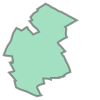

In [20]:
geo_df_shp.loc[0, "geometry"]

In [7]:
reader = shp.Reader(abspath(Path("..\..\data_lfs\italy_municipal_boundaries_2019_shp\Com01012019_WGS84.shp")))

In [8]:
len(reader.shapes())

7926

In [9]:
def read_shapefile(sf_reader):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf_reader.fields][1:]
    records = sf_reader.records()
    shps = [s.points for s in sf_reader.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [11]:
df = read_shapefile(reader)
df.head()

,FID,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,GlobalID,SHAPE_Le_1,SHAPE_Area,coords
0,1,1,1,1,201,201,1042,001042,Burolo,,0,13222.896787,{428A5371-1203-4014-9D3B-D6F2353A226F},0.141254,5.475974e+06,"[(7.938118057000054, 45.49086119700007), (7.93..."
1,2,1,1,1,201,201,1060,001060,Casalborgone,,0,24056.822202,{7772511B-1529-4A71-8ED1-7880DC64354A},0.270078,2.012501e+07,"[(7.913619178000033, 45.15297605500007), (7.91..."
2,3,1,1,1,201,201,1076,001076,Chianocco,,0,21411.076163,{0F2EE4C5-219C-43DD-AD6E-D8AE5E9F5F7B},0.225795,1.861335e+07,"[(7.183025298000075, 45.19350692800003), (7.18..."
3,4,1,1,1,201,201,1077,001077,Chiaverano,,0,18164.369945,{16E8325A-C7CD-4B85-AB7D-74216B9D06B3},0.196687,1.202212e+07,"[(7.903301218000024, 45.526279988000056), (7.9..."
4,5,1,1,1,201,201,1079,001079,Chiesanuova,,0,10777.398475,{8FF28D8A-C5F5-4214-AFA0-999D470CF9C8},0.116011,4.118911e+06,"[(7.65285156300007, 45.42980860800003), (7.654..."


In [57]:
df.loc[df["COMUNE"] == "Napoli"]

,FID,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,GlobalID,SHAPE_Le_1,SHAPE_Area,coords
3903,3904,4,15,63,263,263,63049,063049,Napoli,,1,111372.177741,{4BB0E200-7AE7-417C-A9CD-93223603720B},1.173131,1.189441e+08,"[(14.159209066000074, 40.80804322200004), (14...."


In [33]:
my_id = df.loc[df["COMUNE"] == "Giugliano in Campania", "FID"].values[0]

In [22]:
def plot_shape(reader, id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = reader.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(12.919064795580695, 42.478863782626235)

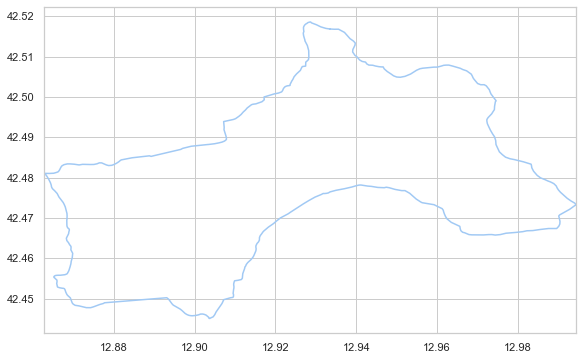

In [34]:
plot_shape(reader, my_id)

In [58]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        if shape.record[2] == 15:
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            plt.plot(x, y, 'k')

            if (x_lim == None) & (y_lim == None):
                x0 = np.mean(x)
                y0 = np.mean(y)
    #             plt.text(x0, y0, id, fontsize=10)
            id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

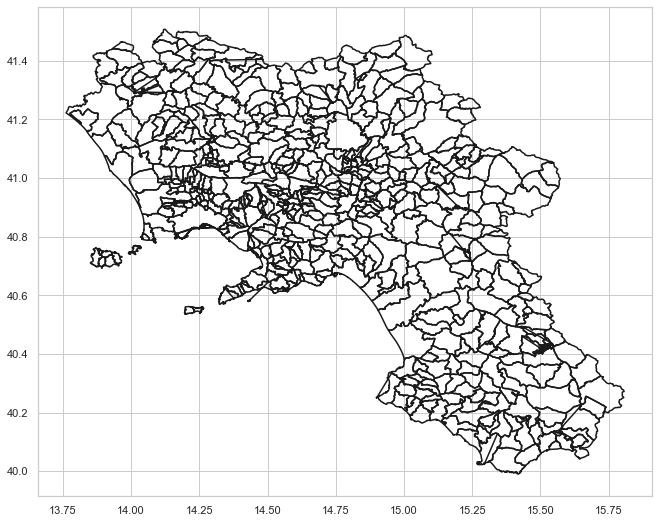

In [59]:
plot_map(reader)

In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

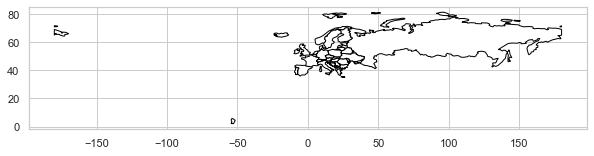

In [19]:
# We restrict to South America.
ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
# gdf.plot(ax=ax, color='red')

plt.show()